In [1]:
# https://www.openml.org/d/40536
# https://www.openml.org/d/32

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from experiment import Experiment
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [10]:
max_depth_range = range(1, 11)
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.0]
n_estimators = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
est_params = {'boost__n_estimators': n_estimators,
          'boost__learning_rate': learning_rate,
          'boost__base_estimator__max_depth': max_depth_range}

In [11]:
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('boost', AdaBoostClassifier(DecisionTreeClassifier()))
                      ])
pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
                        ('impute', SimpleImputer()),
                       ('boost', AdaBoostClassifier(DecisionTreeClassifier()))
                      ])

In [13]:
pen_experiment.run()


Boosting with Decision Tree on Pen digits training took 0:09:15.881274
Boosting with Decision Tree on Pen digits Test Score: 0.9930858806404658


In [12]:
pen_experiment = Experiment('Boosting with Decision Tree', 32, 'Pen digits', pipe1, est_params, validationCurveParams=[
    ('boost__n_estimators', '# Estimators', 'linear'),
    ('boost__learning_rate', 'Learning Rate', 'linear'),
    ('boost__base_estimator__max_depth', 'DT max depth', 'linear')
], reshape=False)

dating_experiment = Experiment('Boosting with Decision Tree', 40536, 'Speed Dating', pipe2, est_params, validationCurveParams=[
    ('boost__n_estimators', '# Estimators', 'linear'),
    ('boost__learning_rate', 'Learning Rate', 'linear'),
    ('boost__base_estimator__max_depth', 'DT max depth', 'linear')
], reshape=False)

boost_experiments = {'pen': pen_experiment, 'date': dating_experiment}

In [5]:
pen_experiment.run()
dating_experiment.run()

Boosting with Decision Tree on Pen digits training took 0:36:11.560244
Boosting with Decision Tree on Pen digits Test Score: 0.9945414847161572
Boosting with Decision Tree on Speed Dating training took 1:16:02.239271
Boosting with Decision Tree on Speed Dating Test Score: 0.8572792362768497


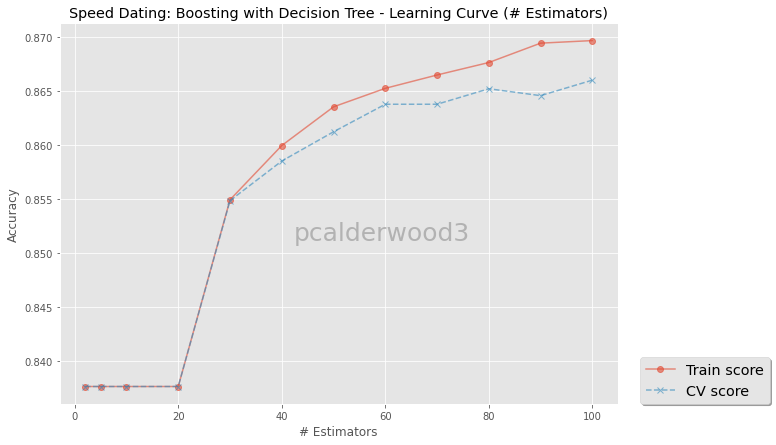

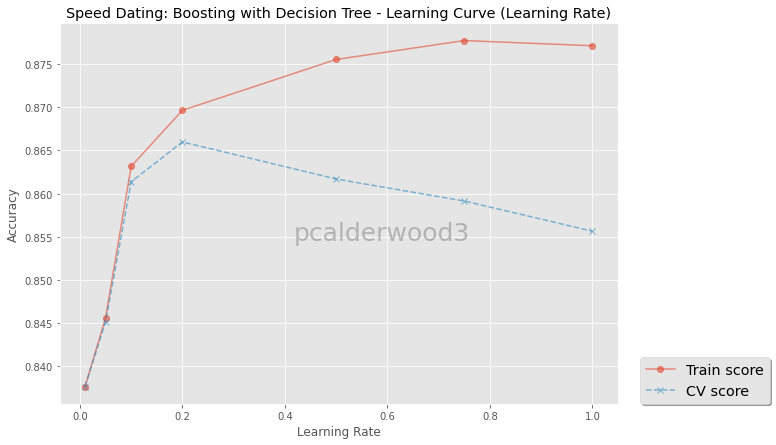

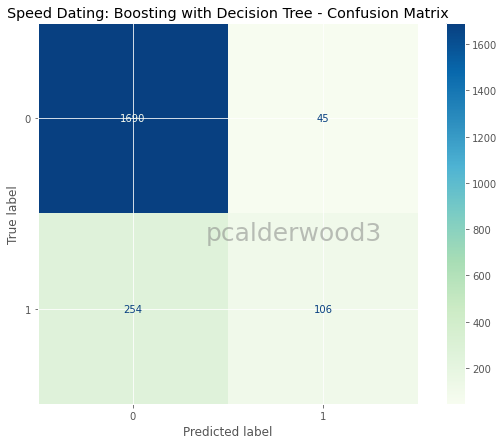

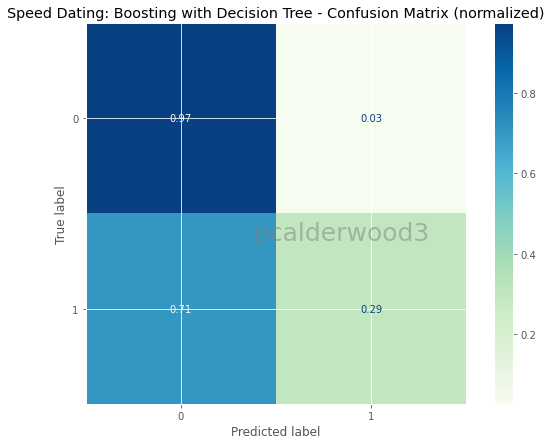

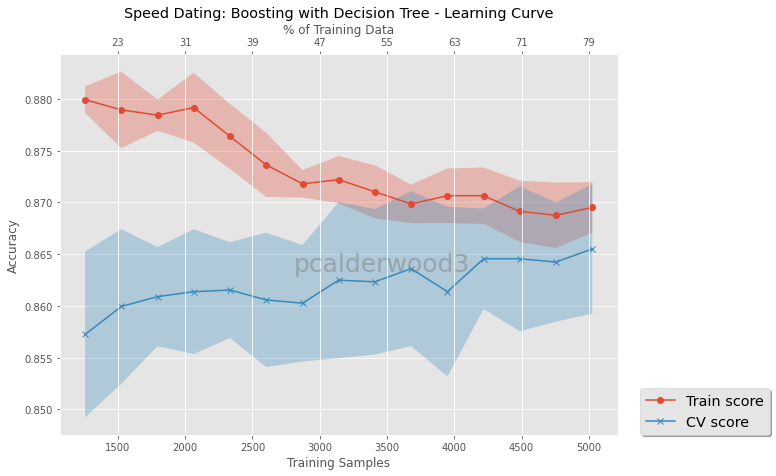

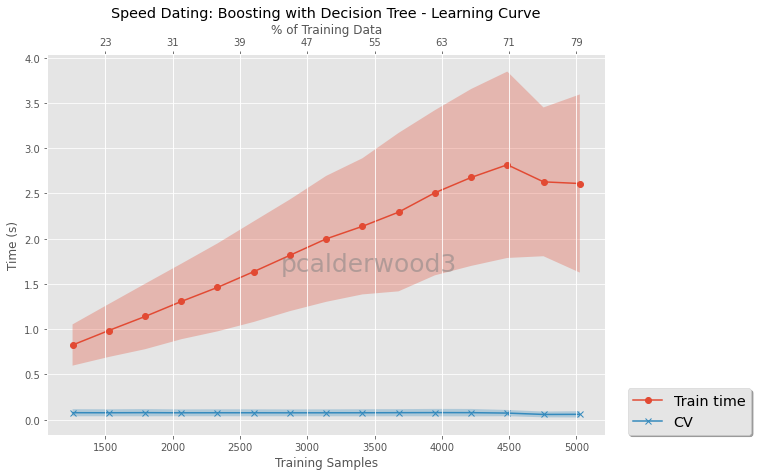

Best parameters took 0:00:03.120704 to train


In [6]:
dating_experiment.plotValidation()
dating_experiment.plotConfusion()
dating_experiment.plotLearningCurve()
dating_experiment.measureFitTime()

In [7]:
print(f'Top 5 params for {dating_experiment.datasetName} using {dating_experiment.leanerName}')
for p in dating_experiment.topParams(5):
    print(p)

Top 5 params for Speed Dating using Boosting with Decision Tree
(0.8659881732362464, {'boost__base_estimator__max_depth': 1, 'boost__learning_rate': 0.2, 'boost__n_estimators': 100})
(0.8653504704862959, {'boost__base_estimator__max_depth': 2, 'boost__learning_rate': 0.2, 'boost__n_estimators': 40})
(0.865192374929693, {'boost__base_estimator__max_depth': 1, 'boost__learning_rate': 0.2, 'boost__n_estimators': 80})
(0.8648730168381903, {'boost__base_estimator__max_depth': 2, 'boost__learning_rate': 0.2, 'boost__n_estimators': 90})
(0.8648730168381903, {'boost__base_estimator__max_depth': 2, 'boost__learning_rate': 0.1, 'boost__n_estimators': 60})


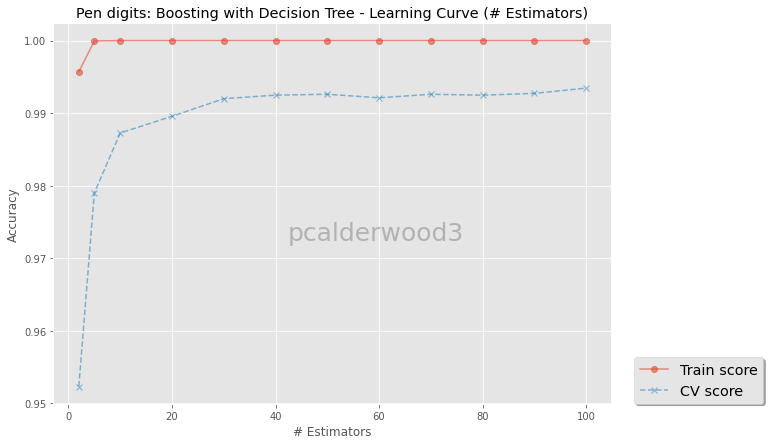

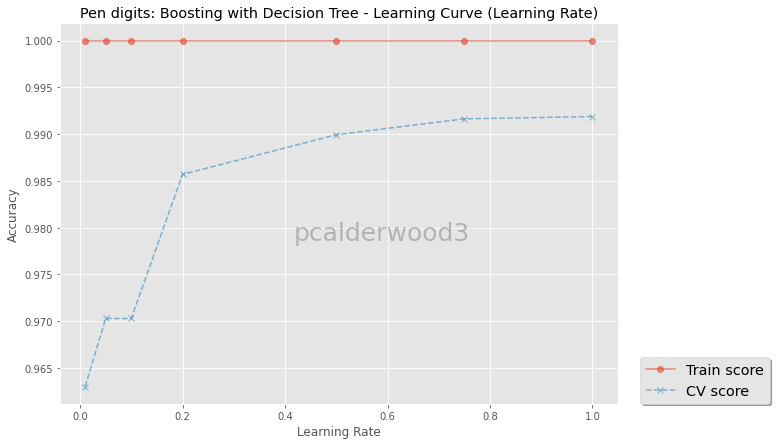

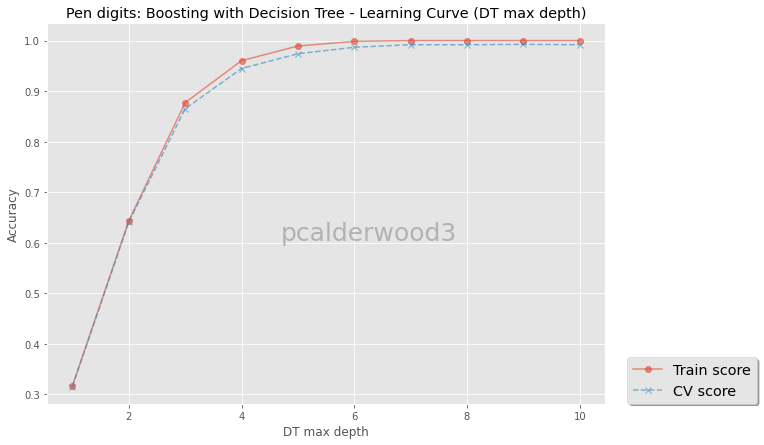

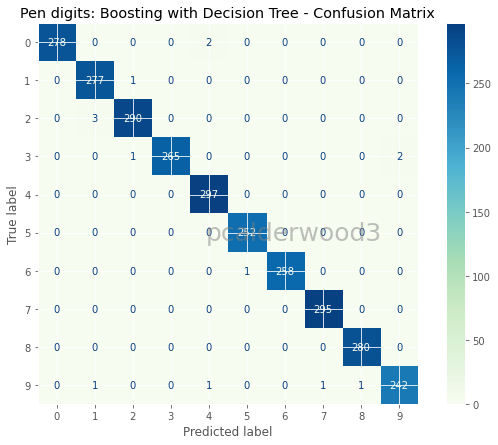

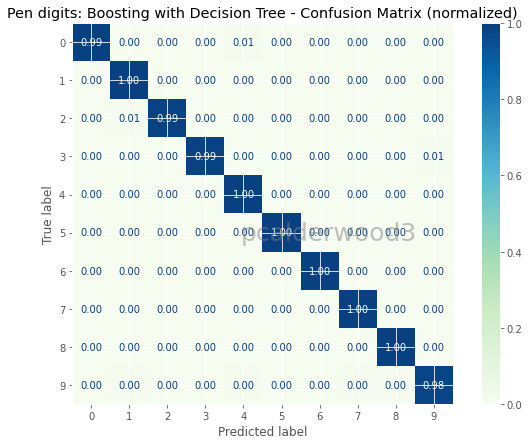

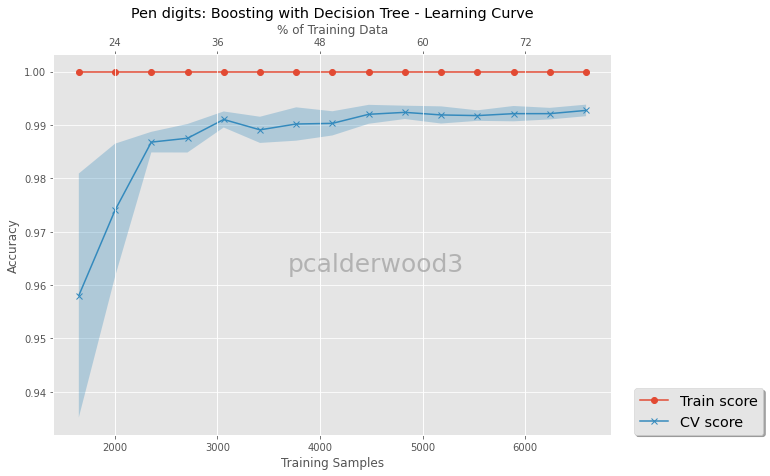

[(0.9932072688949466, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 70}), (0.993207121703651, {'boost__base_estimator__max_depth': 8, 'boost__learning_rate': 1.0, 'boost__n_estimators': 90}), (0.9932069745123553, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 90}), (0.9930859096716457, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 80}), (0.9929646240439925, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 100})]
Best parameters took 0:00:05.844982 to train


In [14]:
pen_experiment.plotValidation()
pen_experiment.plotConfusion()
pen_experiment.plotLearningCurve()
print(pen_experiment.topParams(5))
pen_experiment.measureFitTime()

In [9]:
print(f'Top 5 params for {pen_experiment.datasetName} using {pen_experiment.leanerName}')
for p in pen_experiment.topParams(5):
    print(p)

Top 5 params for Pen digits using Boosting with Decision Tree
(0.9938136970332122, {'boost__base_estimator__max_depth': 9, 'boost__learning_rate': 1.0, 'boost__n_estimators': 100})
(0.9934499137459006, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 60})
(0.9934495457676615, {'boost__base_estimator__max_depth': 9, 'boost__learning_rate': 1.0, 'boost__n_estimators': 90})
(0.9930860568629413, {'boost__base_estimator__max_depth': 10, 'boost__learning_rate': 1.0, 'boost__n_estimators': 100})
(0.9929644768526968, {'boost__base_estimator__max_depth': 9, 'boost__learning_rate': 0.75, 'boost__n_estimators': 90})
